# Pair Programming 31/05 Regresión logística I - Tatiana y Guada

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
#import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

plt.rcParams["figure.facecolor"] = "w"

# Ejercicio 1
- Buscar un conjunto de datos a analizar: (Obviar si se reutiliza el conjunto de las clases anteriores)

Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilidar los análisis.

👩🏻👩🏻‍🦰💬

Hemos elegido otro dataset, ya que el anterior no cumplía con los requisitos. La temática es sobre las tiendas de la página Etsy, plataforma de venta de artesania.

Aquí dejamos la descripción de cada una de las columnas:
- creation_date -> The date that the shop has been created in Etsy website.
- listing_active_count -> The number of active listing this shop has at the moment of capturing the data.
- num_favorers -> Number of people who follow this shop. 
- currency_code -> The ISO currency code for the seller's native currency. 
- is_shop_us_based -> Is this shop USA based?
- sale_message -> Does this shop have a sale message (message send to buyer upon a purchase)?
- sales_count -> Number of sales that the shop has made. 
- review_count -> Number of reviews that the shop has gained. 
- shop_location -> The location of the site (country, city).

In [73]:
df = pd.read_csv("etsy_shops_data.csv")
df.head(10)

,creation_date,listing_active_count,num_favorers,currency_code,is_shop_us_based,sale_message,sales_count,review_count,shop_location
0,19-Nov,3,1,USD,True,False,0,0,"Kansas City, Missouri"
1,19-Nov,13,1,AUD,False,False,2,0,None
2,19-Nov,0,0,USD,True,False,-99,-99,None
3,19-Nov,40,1,USD,False,False,0,0,"Kharkiv, Ukraine"
4,19-Nov,7,1,USD,True,False,0,0,"New York, United States"
5,19-Nov,0,40,USD,True,False,14,1,None
6,19-Nov,1,0,USD,True,False,0,0,None
7,19-Nov,0,0,USD,False,False,0,0,None
8,19-Nov,8,1,USD,True,False,0,0,None
9,19-Nov,7,1,USD,True,False,0,0,None


👩🏻👩🏻‍🦰💬

Nos deshacemos de las columnas que no nos sirven de nuestro dataset.

In [74]:
df = df.drop(["creation_date", "currency_code", "shop_location"], axis = 1)

# Ejercicio 2
- Explicar los datos y las variables disponibles en el conjunto de datos seleccionado: (Obviar si se reutiliza el conjunto de las clases anteriores)

Esto se hace para que comprendais mejor los datos con los que estais trabajando.

Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [75]:
df.describe()

,listing_active_count,num_favorers,sales_count,review_count
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,7.335950,0.996800,-5.583750,-7.541550
std,24.582274,4.104148,38.041153,26.437608
min,0.000000,0.000000,-99.000000,-99.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,0.000000,0.000000
max,1749.000000,223.000000,2216.000000,58.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   listing_active_count  20000 non-null  int64
 1   num_favorers          20000 non-null  int64
 2   is_shop_us_based      20000 non-null  bool 
 3   sale_message          20000 non-null  bool 
 4   sales_count           20000 non-null  int64
 5   review_count          20000 non-null  int64
dtypes: bool(2), int64(4)
memory usage: 664.2 KB


In [77]:
df.isnull().sum()

listing_active_count    0
num_favorers            0
is_shop_us_based        0
sale_message            0
sales_count             0
review_count            0
dtype: int64

In [78]:
df["num_favorers"].unique()

array([  1,   0,  40,   2,   6,   4,   3,   7,   9,   5,  10,  18,  19,
        12,  17,   8,  28,  33,  16,  14,  13,  78,  34,  11,  15,  23,
        31,  53,  45,  21,  50,  29,  38, 115,  26,  20,  24, 105,  57,
        67,  25,  56,  27,  84,  43,  37,  87, 130,  35,  32,  22, 142,
       191,  47, 223,  48,  39,  42,  63,  49,  30,  44,  36, 106])

In [79]:
df["sales_count"].unique()

array([   0,    2,  -99,   14,    1,   22,    6,  156,    5,    7,    8,
          3,    4,    9,   16,   20,   15,   28,   10,   12,   59,   25,
         23,  498,   37,   68,   33,   36,   29,   55,   69,   83,   34,
         11,   26,   27,  112,   62,  183,   39,   21,  106,  163,   95,
         35,   13,   19,   50,   17,   43,   64,   66,  113,  147,  111,
        104,   18,   51,   60,  254,  101,   98,   44,   78,   93,  109,
         24,   58,   72,   74,   47,   65,   46,   80,  161,   32,  389,
         30,   38,  247,   49,   42,   45,   85,  314,   53,  255,  134,
         73, 1285,   41,  143,   71, 1508,   40,  889,   54,  457,  110,
         31,   57,  105,  299,   48,  803,  264,  580, 2216,  316,  107,
         86,  471,  251,   94,  118,   61,  103,  193,   70,  167, 1096])

👩🏻👩🏻‍🦰💬

Hemos escogido la columna "num_favorers" como variable dependiente y la columna "sales_count" como variable independiente. Primero vamos a ver como son y si tenemos que limpiar algo en concreto.

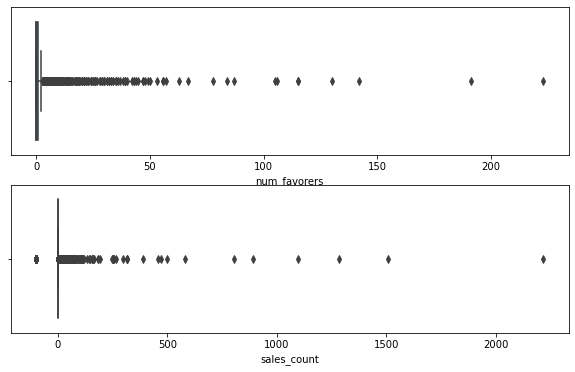

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
df_elegido = df[["num_favorers", "sales_count"]]
for i in range(len(df_elegido.columns)):
    sns.boxplot(x = df_elegido.columns[i], data = df, ax=axes[i]); 

plt.show()

In [81]:
#veamos como son la media y la mediana en ambas columnas. Si no difieren mucho entre ellas, usaremos la media.
print(df["num_favorers"].median())
print(df["num_favorers"].mean())
print(df["sales_count"].median())
print(df["sales_count"].mean())

0.0
0.9968
0.0
-5.58375


In [82]:
x=df_elegido["num_favorers"].values.reshape(-1, 1)
y= df_elegido["sales_count"].values.reshape(-1, 1) 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [83]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

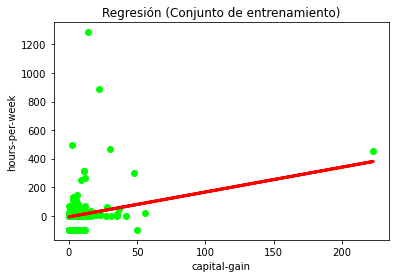

In [84]:
plt.scatter(x_test,y_test,color="lime")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel("capital-gain")
plt.ylabel("hours-per-week")
plt.show()

👩🏻👩🏻‍🦰💬

Vamos a probar a limpiar outliers, para ver si cambian los datos.

In [85]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
         
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 


lista_columnas = list(df_elegido.columns)
indices = detectar_outliers(lista_columnas, df_elegido)
indices 

{'num_favorers': [5,
  12,
  38,
  57,
  58,
  78,
  80,
  88,
  114,
  118,
  166,
  176,
  184,
  188,
  202,
  204,
  207,
  222,
  224,
  238,
  239,
  242,
  249,
  253,
  264,
  271,
  279,
  281,
  282,
  286,
  292,
  294,
  299,
  300,
  305,
  306,
  329,
  375,
  386,
  387,
  399,
  400,
  403,
  421,
  465,
  482,
  484,
  488,
  494,
  500,
  531,
  532,
  553,
  577,
  593,
  608,
  620,
  669,
  692,
  697,
  700,
  704,
  717,
  718,
  721,
  740,
  770,
  771,
  777,
  780,
  795,
  797,
  800,
  802,
  811,
  819,
  822,
  845,
  848,
  851,
  876,
  890,
  906,
  913,
  918,
  922,
  926,
  930,
  935,
  960,
  961,
  963,
  978,
  986,
  1018,
  1044,
  1045,
  1080,
  1092,
  1094,
  1104,
  1116,
  1117,
  1122,
  1136,
  1151,
  1172,
  1173,
  1187,
  1188,
  1204,
  1213,
  1227,
  1231,
  1236,
  1250,
  1263,
  1268,
  1277,
  1287,
  1289,
  1299,
  1300,
  1305,
  1318,
  1348,
  1353,
  1445,
  1452,
  1514,
  1626,
  1636,
  1638,
  1647,
  1648,
  1661,

In [86]:
for key, values in indices.items():
    media = df_elegido[key].mean() 
    mediana = df_elegido[key].median()
    
    if key == "num_favorers" or key == "sales_count":
        for i in values: 
            df.loc[i,key] = media
    else:
        pass

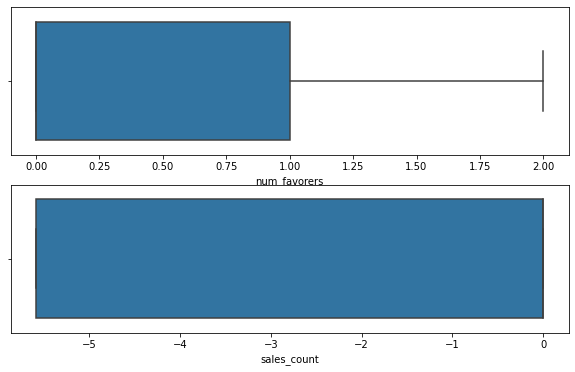

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
df_elegido = df[["num_favorers", "sales_count"]]
for i in range(len(df_elegido.columns)):
    sns.boxplot(x = df_elegido.columns[i], data = df, ax=axes[i]); 

In [88]:
x=df_elegido["num_favorers"].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.En x ponemos la variable dependiente
y= df_elegido["sales_count"].values.reshape(-1, 1) # La variable independiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [89]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

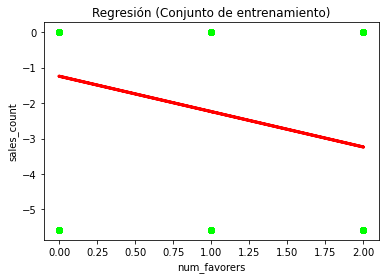

In [90]:
plt.scatter(x_test,y_test,color="lime")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel("num_favorers")
plt.ylabel("sales_count")
plt.show()

👩🏻👩🏻‍🦰💬

Vemos que nuestra nueva línea de regresión es bastante diferente y no nos gusta. Nos quedaremos mejor con los otros datos.

# Ejercicio 3 
- Realiza el ajuste logístico utilizando diversas métricas y realiza una gráfica mostrando los resultados.

👩🏻👩🏻‍🦰💬

Para este ajuste, usaremos la columna "sale_message" como variable dependiente 

In [91]:
x = df.drop(["sale_message"], axis = 1)
y = df["sale_message"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(16000, 5) (16000,)
(4000, 5) (4000,)


In [92]:

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)
# ajustamos el modelo
log_reg.fit(x_train,y_train)
# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)
# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)

train_score_lr = accuracy_score(y_train, y_pred_train)
print('Para el conjunto train:---------------')
print('El valor de accuracy  es ',train_score_lr)

print('Para el conjunto test:---------------')
test_score_lr = accuracy_score(y_test, y_pred_test)
print('El valor de accuracy  es ',test_score_lr)

Para el conjunto train:---------------
El valor de accuracy  es  0.9034375
Para el conjunto test:---------------
El valor de accuracy  es  0.895


👩🏻👩🏻‍🦰💬

El valor de nuestro accuracy está cerca de 1

Text(87.0, 0.5, 'true value')

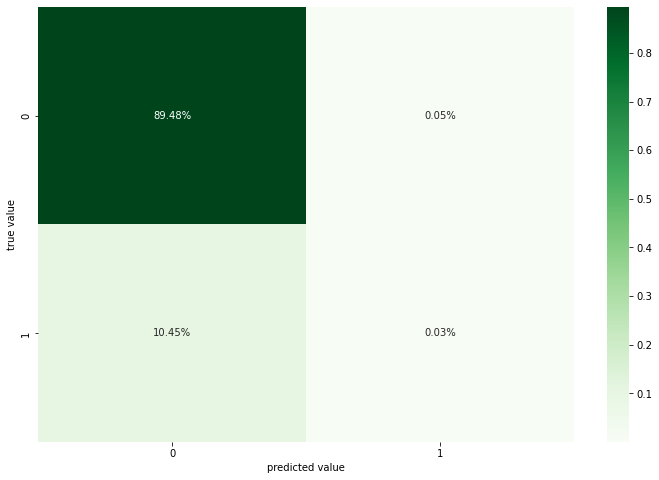

In [97]:
mat_lr = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr/np.sum(mat_lr), annot=True, 
            fmt='.2%', cmap='Greens')
plt.xlabel('predicted value')
plt.ylabel('true value')


👩🏻👩🏻‍🦰💬

De la matriz de confuisión podemos ver que las predicciones obtenidas son muy buenas, ya que han predecido bien cerca del 80% de los valores posibles. También tenemos un número no muy bajo de falsos positivos. 

The score AUC is: 0.5009140658167376


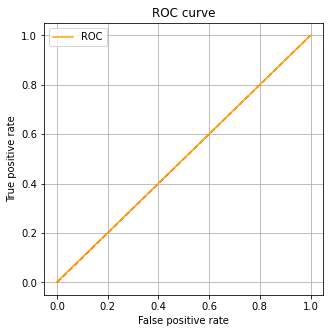

In [99]:
#Curva de ROC y Valor AUC

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_test)
auc_LR=roc_auc_score(y_test, y_pred_test)
print('The score AUC is:',auc_LR)

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.plot(fpr_log, tpr_log, color='orange', label='ROC')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

👩🏻👩🏻‍🦰💬

Tanto la curva ROC como el AUC, nos devuelve la misma línea, con un scor AUC de 0.5, lo que implica que se puede mejorar mucho este resultado.

# Ejercicio 4
- Interpretación de los resultados.

Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos